データの準備

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
# ボストンの住宅価格サンプルデータのロード
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

データの概要をみる

Text(0, 0.5, 'Number of houses')

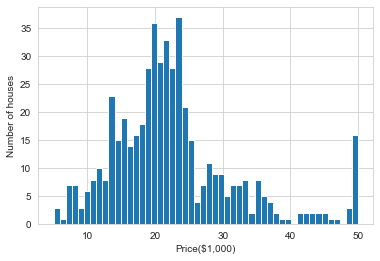

In [4]:
plt.hist(boston.target,bins=50)
plt.xlabel('Price($1,000)')
plt.ylabel('Number of houses')

Text(0, 0.5, 'Price($1,000)')

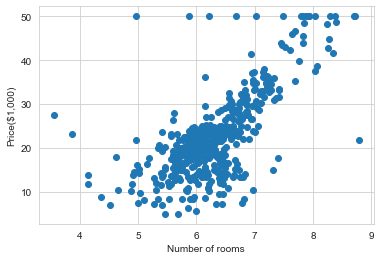

In [5]:
# 部屋数と住宅価格
plt.scatter(boston.data[:,5],boston.target)
plt.xlabel('Number of rooms')
plt.ylabel('Price($1,000)')

In [6]:
# pandas
boston_df = DataFrame(boston.data)

# 列名を入れる
boston_df.columns = boston.feature_names

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# dfにtargetを格納（目的変数）
boston_df['Price'] = boston.target

In [9]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


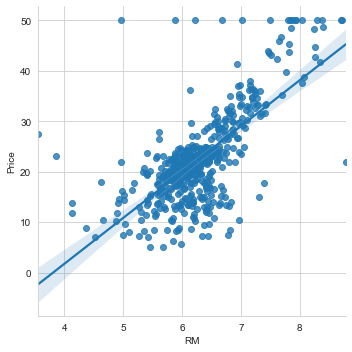

In [10]:
sns.lmplot('RM','Price',data=boston_df)

単回帰を使って予測するということは、この直線のしきを求めるということになる
最小二乗法を使って、回帰直線の係数を求めていく

## numpyを使った単回帰

In [11]:
X = boston_df.RM
X.shape

(506,)

In [12]:
# numpyで使用するには二次元配列にする必要がある
X = np.vstack(boston_df.RM)
X.shape

(506, 1)

In [13]:
Y = boston_df.Price

In [14]:
# リスト内包表記
X = np.array([[value[0], 1] for value in X])

In [15]:
# 最小二乗法の計算を実行します。
a, b = np.linalg.lstsq(X, Y)[0]

<ipython-input-15-6ec2f5b3331d>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, b = np.linalg.lstsq(X, Y)[0]


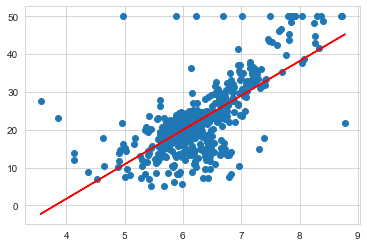

In [16]:
# まずは元のデータをプロットします。
plt.plot(boston_df.RM,boston_df.Price,'o')

# 求めた回帰直線を描きます。
x= boston_df.RM
plt.plot(x, a*x + b,'r')

numpyを使うと、簡単に係数を求められる

In [20]:
# 誤差の合計、平均値を調べることによって、当てはまりの良さを調べる
result = np.linalg.lstsq(X,Y)

<ipython-input-20-5c83eda00b2a>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(X,Y)


In [21]:
error_total = result[1]
rmse = np.sqrt(error_total/len(X))

In [22]:
print('平均二乗誤差の平方根={:0.2f}'.format(rmse[0]))

平均二乗誤差の平方根=6.60


In [23]:
# 標準偏差とイメージが一緒　6.60の2倍、、±１３、２０の間に全体の９２％が入るということがわかる

## sklearnを使った重回帰分析

In [24]:
import sklearn
from sklearn.linear_model import LinearRegression as LR

In [26]:
lreg = LR()
x_multi = boston_df.drop('Price',1)

In [27]:
Y_target = boston_df.Price

In [28]:
lreg.fit(x_multi,Y_target)

LinearRegression()

In [29]:
lreg.intercept_

36.45948838509015

In [31]:
len(lreg.coef_)

13

In [37]:
# 新しいデータフレームを作成し、予測データを挿入
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

In [38]:
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

In [39]:
coeff_df.head()

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
